# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [34]:
#Who: Risk Management team at an bank.

#What: Being a liason to the risk management team to understand a predictive model that I had developed.
#making sure to get approval for pilot testing of the model and resource allocation to support the development and deployment.

#How: Deliver a live presentation using a slide deck. The visuals will highlight the model’s performance followed up with a detailed report documenting the methodology, performance metrics, and data used, for stakeholders to review asynchronously.

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [18]:

import kagglehub
import os


In [19]:
path = kagglehub.dataset_download("tusharbhadouria/credit-card-fraud-detection")
print("Path to dataset files:", path)


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/tusharbhadouria/credit-card-fraud-detection/versions/1


In [20]:
credit_fraud_path_to_file = os.path.join(path, "fraudTrain.csv")
credit_fraud_raw_train = pd.read_csv(credit_fraud_path_to_file)

credit_fraud_path_to_file_test = os.path.join(path,"fraudTest.csv")
credit_fraud_raw_test = pd.read_csv(credit_fraud_path_to_file_test)


In [ ]:
#info and describe for datat
print(" Info for fraudTrain.csv ")
credit_fraud_raw_train.info()

print("\n Describe for fraudTrain.csv ")
credit_fraud_raw_train.describe()


In [ ]:
print("\n Info for fraudTest.csv ")
credit_fraud_raw_test.info()

print("\n Describe for fraudTest.csv ")
credit_fraud_raw_test.describe()

In [23]:
#Summing up how many duplicates there are
duplicate_rows_train = credit_fraud_raw_train.duplicated().sum()
print(f"Number of duplicate rows in fraudTrain.csv: {duplicate_rows_train}")

duplicate_rows_test = credit_fraud_raw_test.duplicated().sum()
print(f"Number of duplicate rows in fraudTest.csv: {duplicate_rows_test}")

#dropping duplicates
if duplicate_rows_train > 0:
    credit_fraud_raw_train_cleaned = credit_fraud_raw_train.drop_duplicates().copy()
    print(f"Removed {duplicate_rows_train} duplicate rows from fraudTrain.csv.")
    print(f"New shape of fraudTrain.csv: {credit_fraud_raw_train_cleaned.shape}")
else:
    credit_fraud_raw_train_cleaned = credit_fraud_raw_train.copy() # Create a copy even if no duplicates
    print("No full duplicate rows found in fraudTrain.csv.")

if duplicate_rows_test > 0:
    credit_fraud_raw_test_cleaned = credit_fraud_raw_test.drop_duplicates().copy()
    print(f"Removed {duplicate_rows_test} duplicate rows from fraudTest.csv.")
    print(f"New shape of fraudTest.csv: {credit_fraud_raw_test_cleaned.shape}")
else:
    credit_fraud_raw_test_cleaned = credit_fraud_raw_test.copy() # Create a copy even if no duplicates
    print("No full duplicate rows found in fraudTest.csv.")


Number of duplicate rows in fraudTrain.csv: 0
Number of duplicate rows in fraudTest.csv: 0
No full duplicate rows found in fraudTrain.csv.
No full duplicate rows found in fraudTest.csv.


In [28]:
#Checking for duplicates in column where this would be inappropriate
unique_id_column = 'trans_num'  #Going to check transaction number column where which each transaction should have a unique number

if unique_id_column in credit_fraud_raw_train_cleaned.columns:
    duplicate_ids_train = credit_fraud_raw_train_cleaned[unique_id_column].duplicated().sum()
    print(f"\nNumber of duplicate {unique_id_column} in fraudTrain.csv: {duplicate_ids_train}")

    if duplicate_ids_train > 0:
        print(f"Warning: Duplicate values found in {unique_id_column}. This might be an issue if it's supposed to be a unique identifier.")
    else:
        print(f"No duplicate values found in {unique_id_column} in fraudTrain.csv.")
else:
    print(f"\nNo column named '{unique_id_column}' found in fraudTrain.csv to check for unique IDs.")
    print("This step is typically applied to columns that are expected to be unique identifiers (e.g., customer IDs, order IDs).")



Number of duplicate trans_num in fraudTrain.csv: 0
No duplicate values found in trans_num in fraudTrain.csv.


In [ ]:
#Finding mean, median, and mode, for each column
means = credit_fraud_raw_train_cleaned.mean(numeric_only=True)
medians = credit_fraud_raw_train_cleaned.median(numeric_only=True)
modes = credit_fraud_raw_train_cleaned.mode(numeric_only=True).iloc[0]

summary = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

print(summary)


In [31]:
#Finding missing values
missing_train = credit_fraud_raw_train_cleaned.isnull().sum()
print(missing_train[missing_train > 0])

missing_test = credit_fraud_raw_test_cleaned.isnull().sum()
print(missing_test[missing_test > 0])

Series([], dtype: int64)
Series([], dtype: int64)


Conclusion:
The data is usable but would require some preprocessing to make sure that all data is accurate and consistent. 

This particular dataset did not needed to be modified or corrected. From my EDA it looks like there are no missing values or any duplicate values (where inappropriate), however the data should be sifted for any erroneous values, such as negative numbers where not appropriate (i.e. transaction amount).

In fraud dataset there is explicit class imbalance. This is because of the distribution of non-fraudulent transactions versus fradualent transactions. This could lead to skewed performance of the model. A way strong way to mitigate this is by using models that handle this imbalance well such as decision trees.



# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

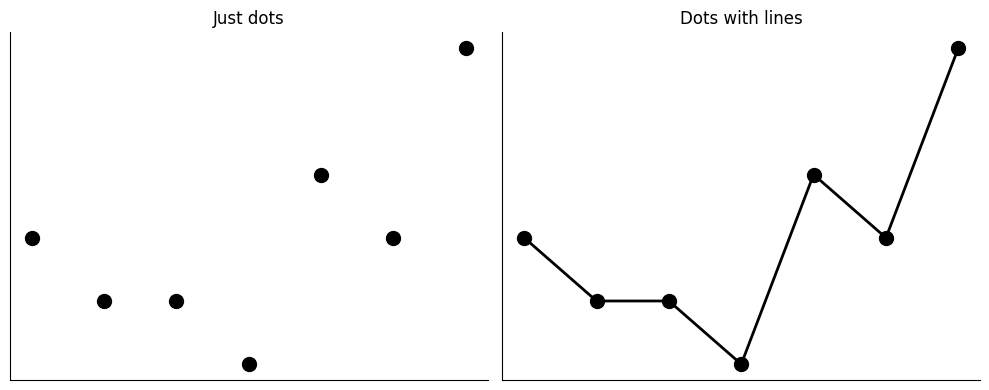

In [33]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7]
y = [5, 4, 4, 3, 6, 5, 8]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(x, y, s=100, color='black')
axs[0].set_title('Just dots')
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].plot(x, y, marker='o', markersize=10, color='black', linewidth=2)
axs[1].set_title('Dots with lines')
axs[1].set_xticks([])
axs[1].set_yticks([])

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
